In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
dataset='/content/drive/MyDrive/DSBDA/heart.csv'
import pandas as pd
import numpy as np
df=pd.read_csv(dataset)

In [ ]:
print(df.shape)
print(df.info())

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


**Check data type**

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
# to know unique values 
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
# change the categorical type to categorical variables
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

Visualization 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

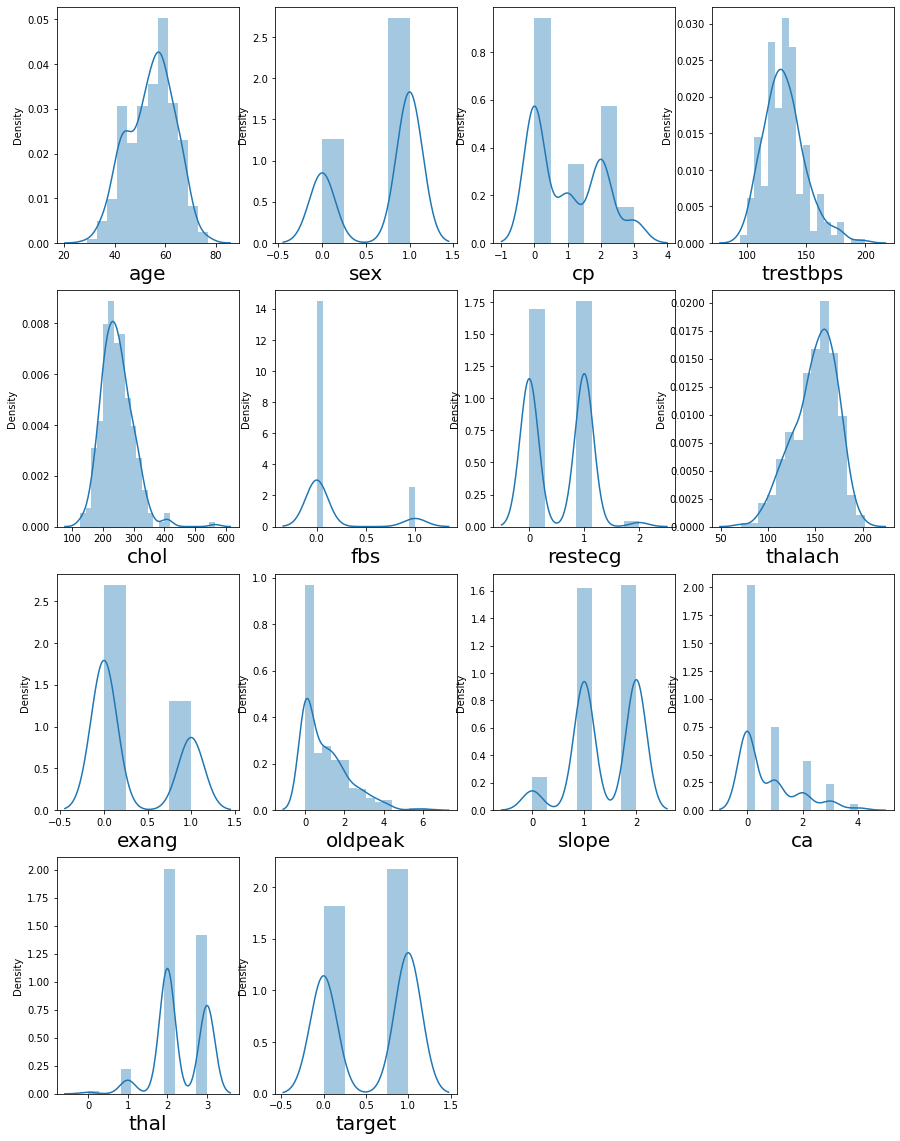

In [ ]:
## checking distributions
plt.figure(figsize=(15,20), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<15 : ## 14 columns in data 
        plt.subplot(4,4,plotnumber)## 4 : rows , 4: columns , plotnumber : position of plot
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

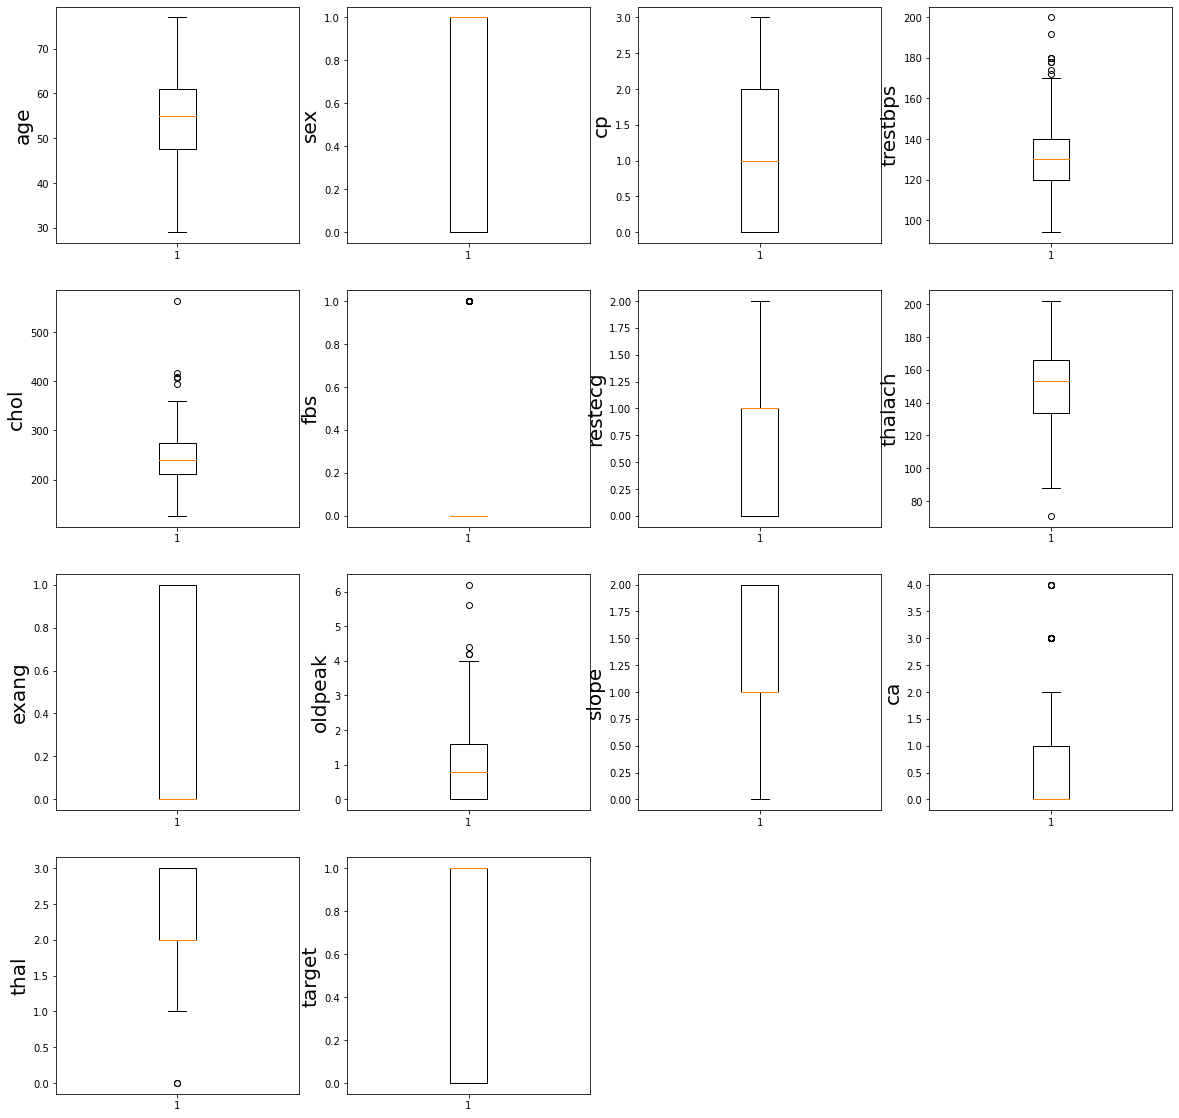

In [ ]:
## Using boxplot
plt.figure(figsize=(20,20), facecolor='white')

plotnumber=1
for column in df.columns:
    if plotnumber<15 :     # as there are 14columns in the data
        plt.subplot(4,4,plotnumber)  ## 4 : rows , 4: columns , plotnumber : position of plot
        plt.boxplot(df[column])
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

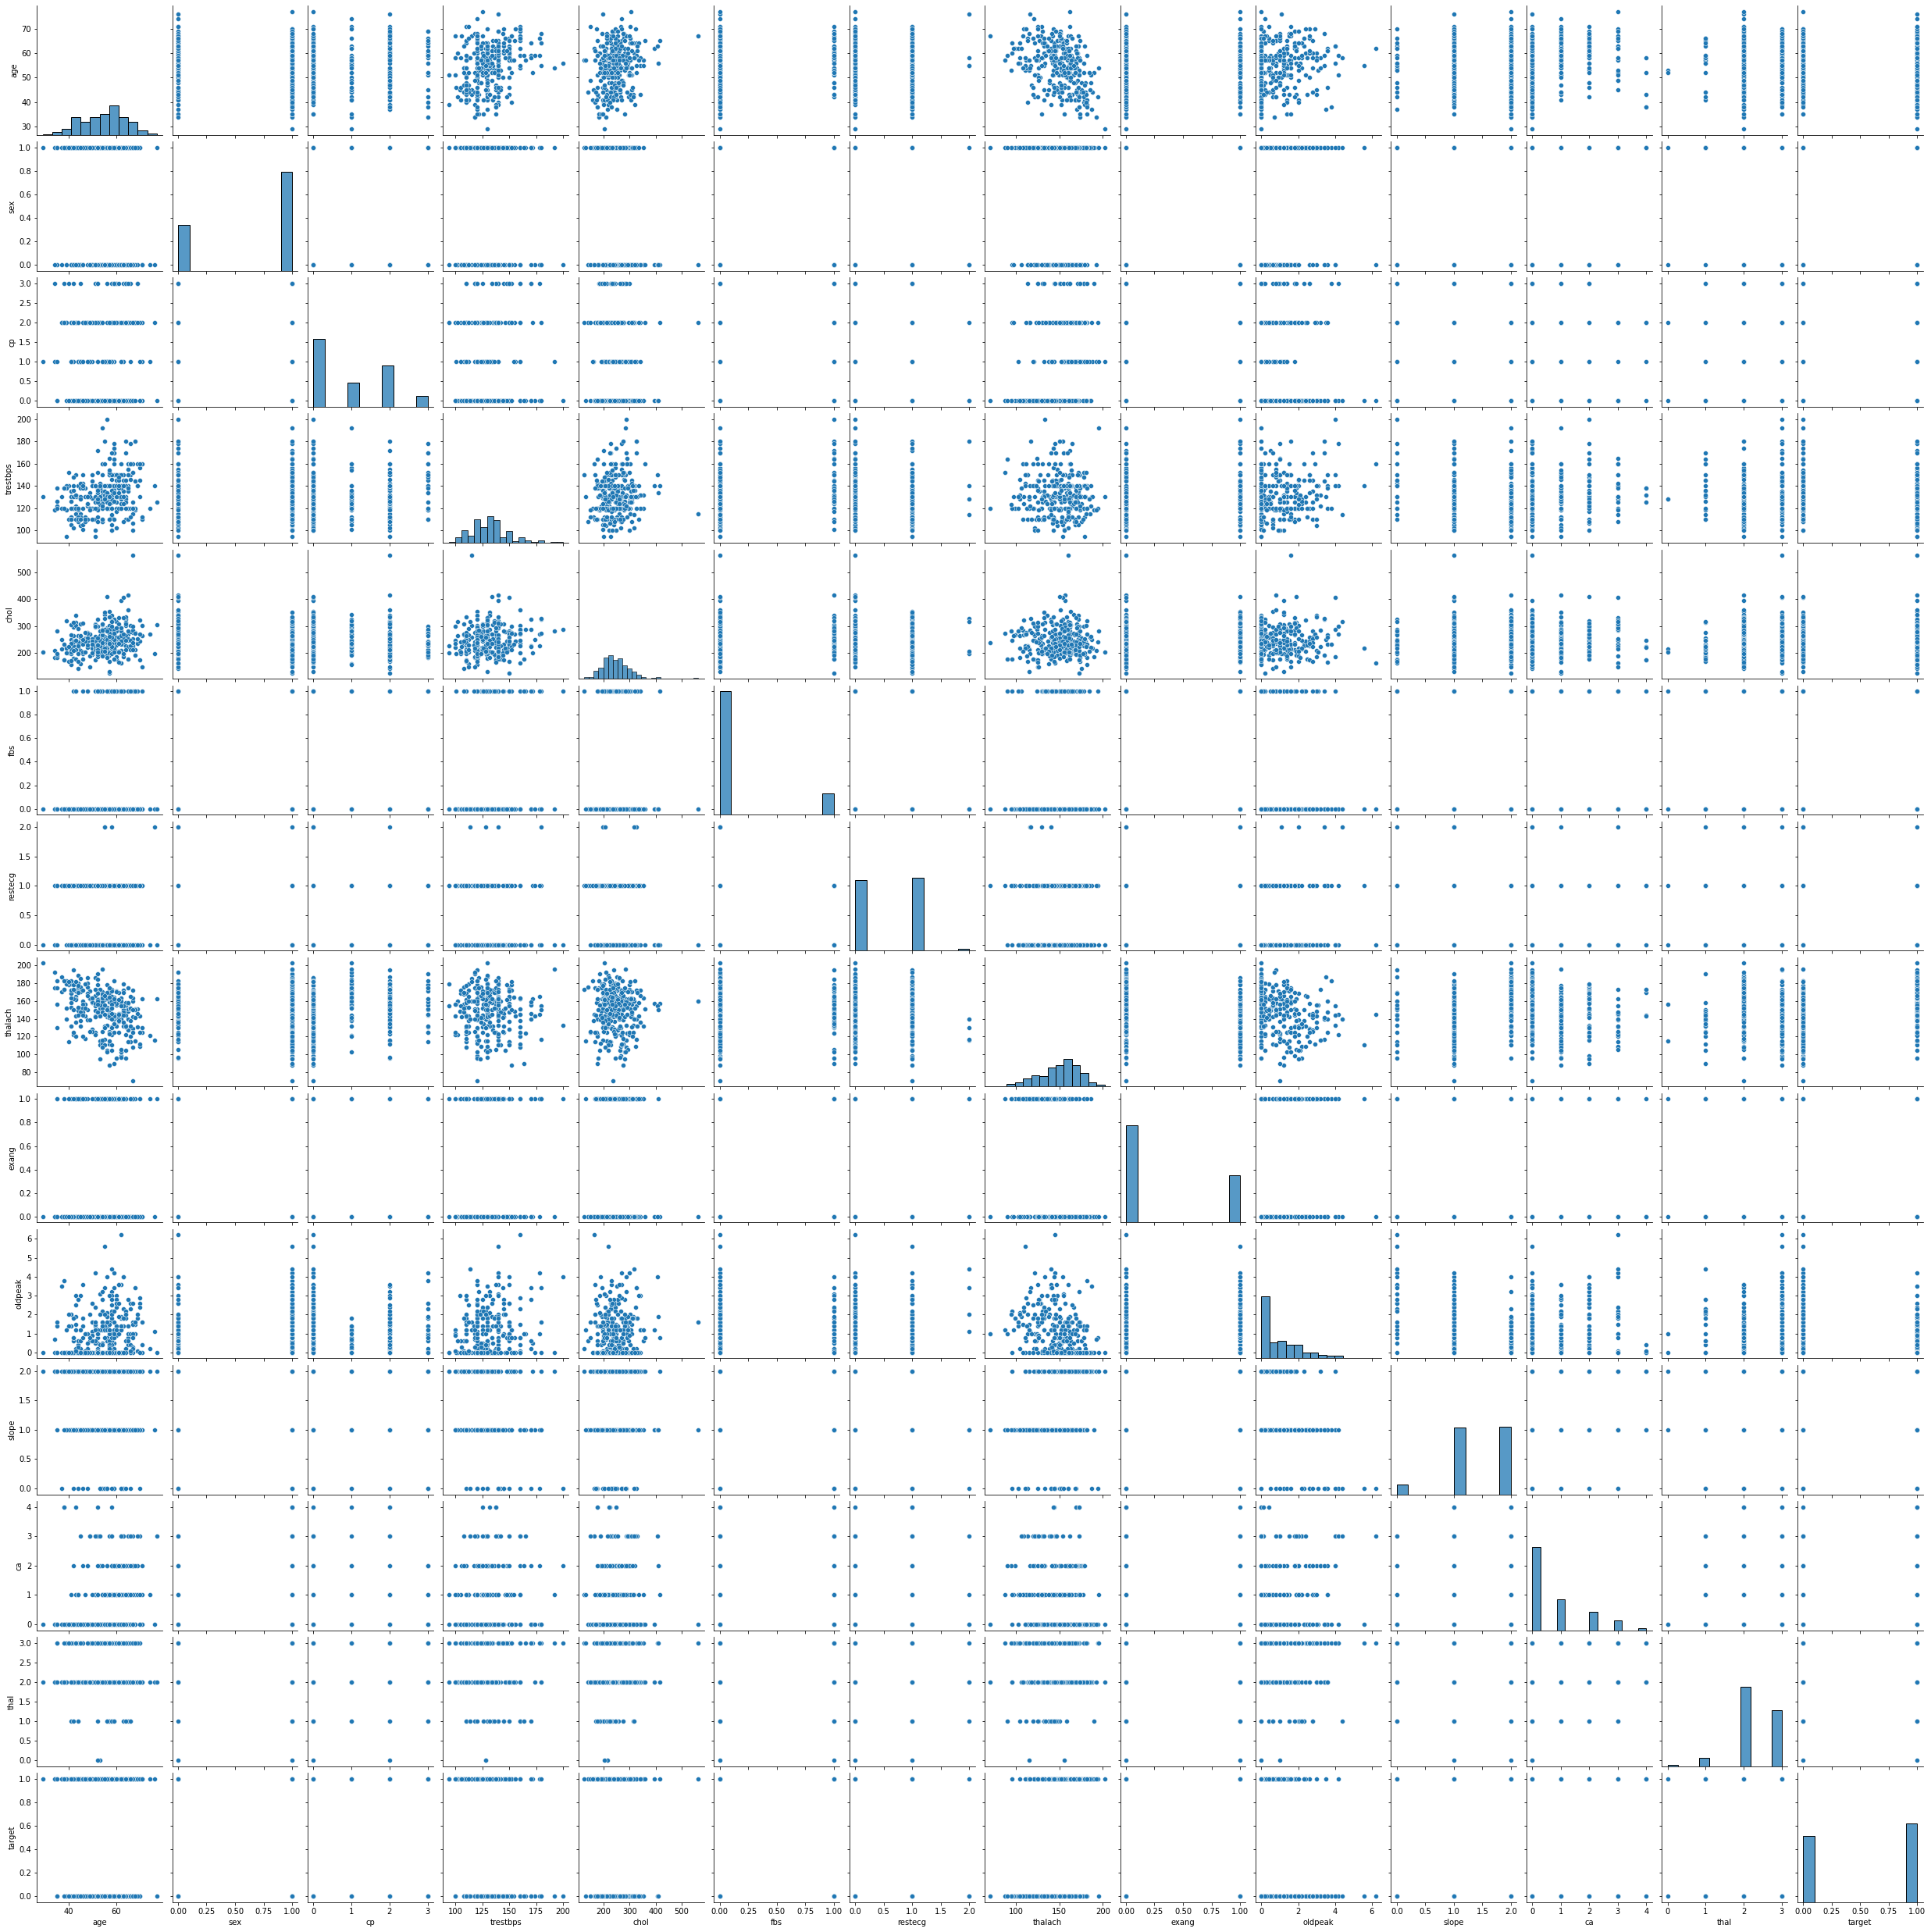

In [ ]:
sns.pairplot(df)

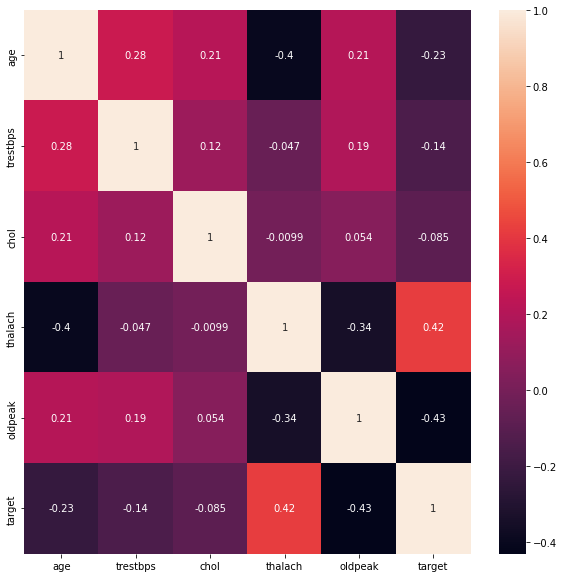

In [ ]:
##correlation
plt.figure(figsize=(10,10), facecolor='white')
cor_matrix=df.corr()
sns.heatmap(cor_matrix,annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


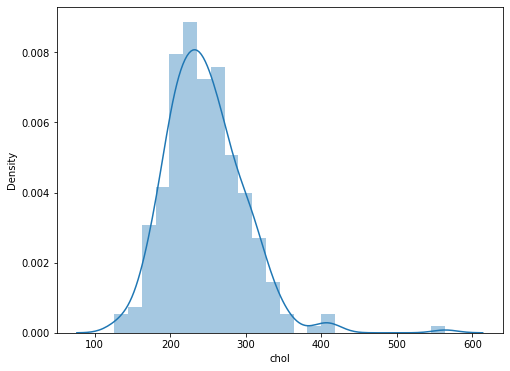

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['chol'])
plt.show()

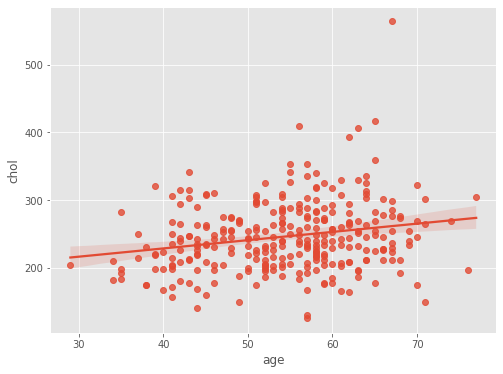

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
sns.regplot(x = df["age"], y = df['chol'])
plt.show()

The above plot confirms that there is a slighly positive correlation between age and chol variables.

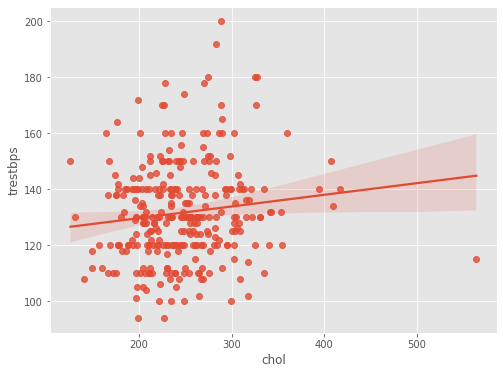

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
sns.regplot(x = df["chol"], y = df['trestbps'])
plt.show()

The above plot shows that there is no correlation between chol and thalach variable.

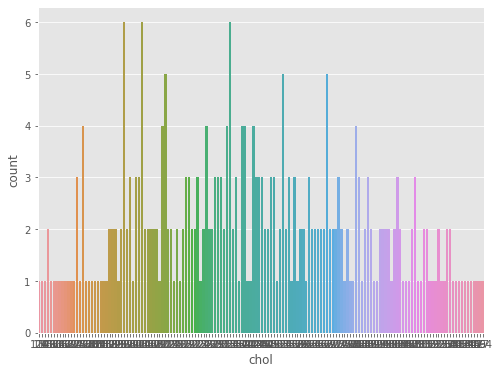

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['chol'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

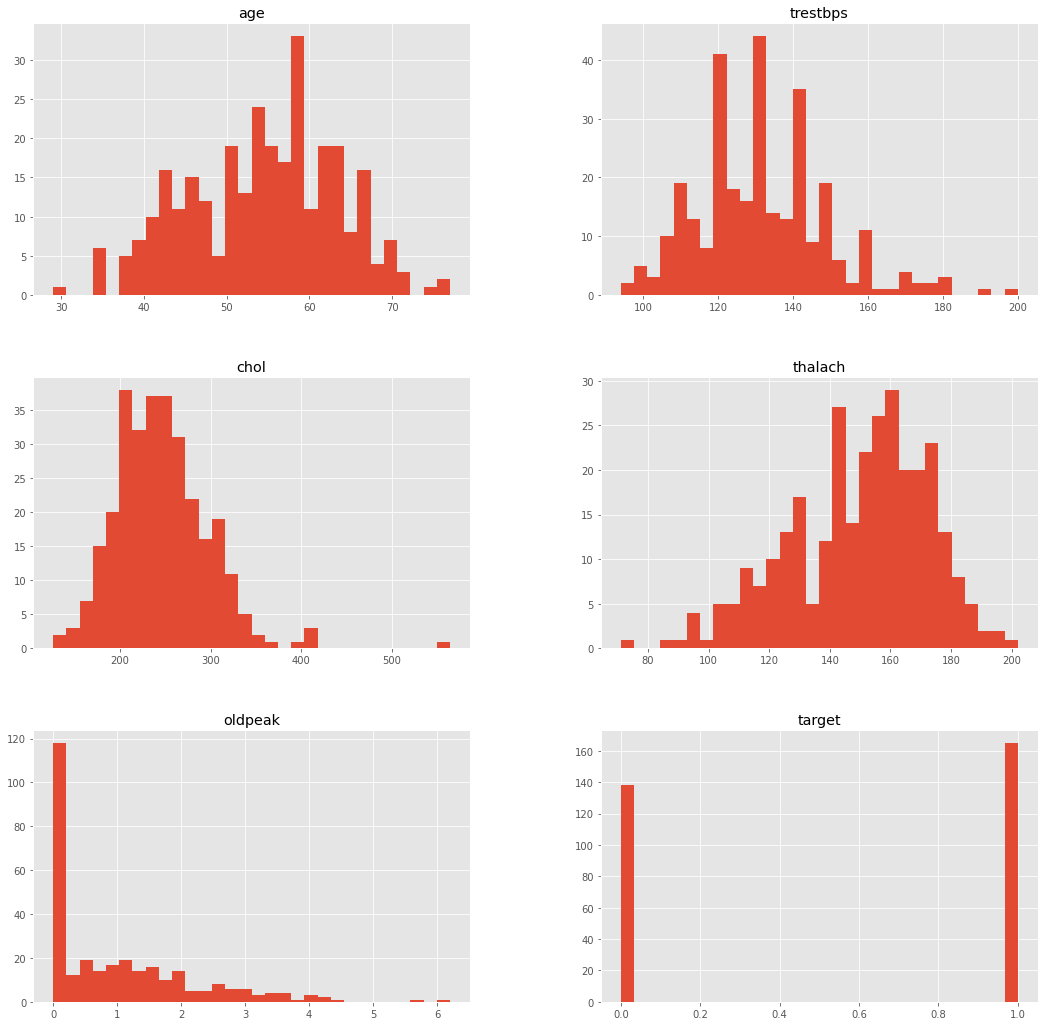

In [ ]:
fig=plt.figure(figsize=(18,18))
ax=fig.gca()
df.hist(ax=ax,bins=30)
plt.show

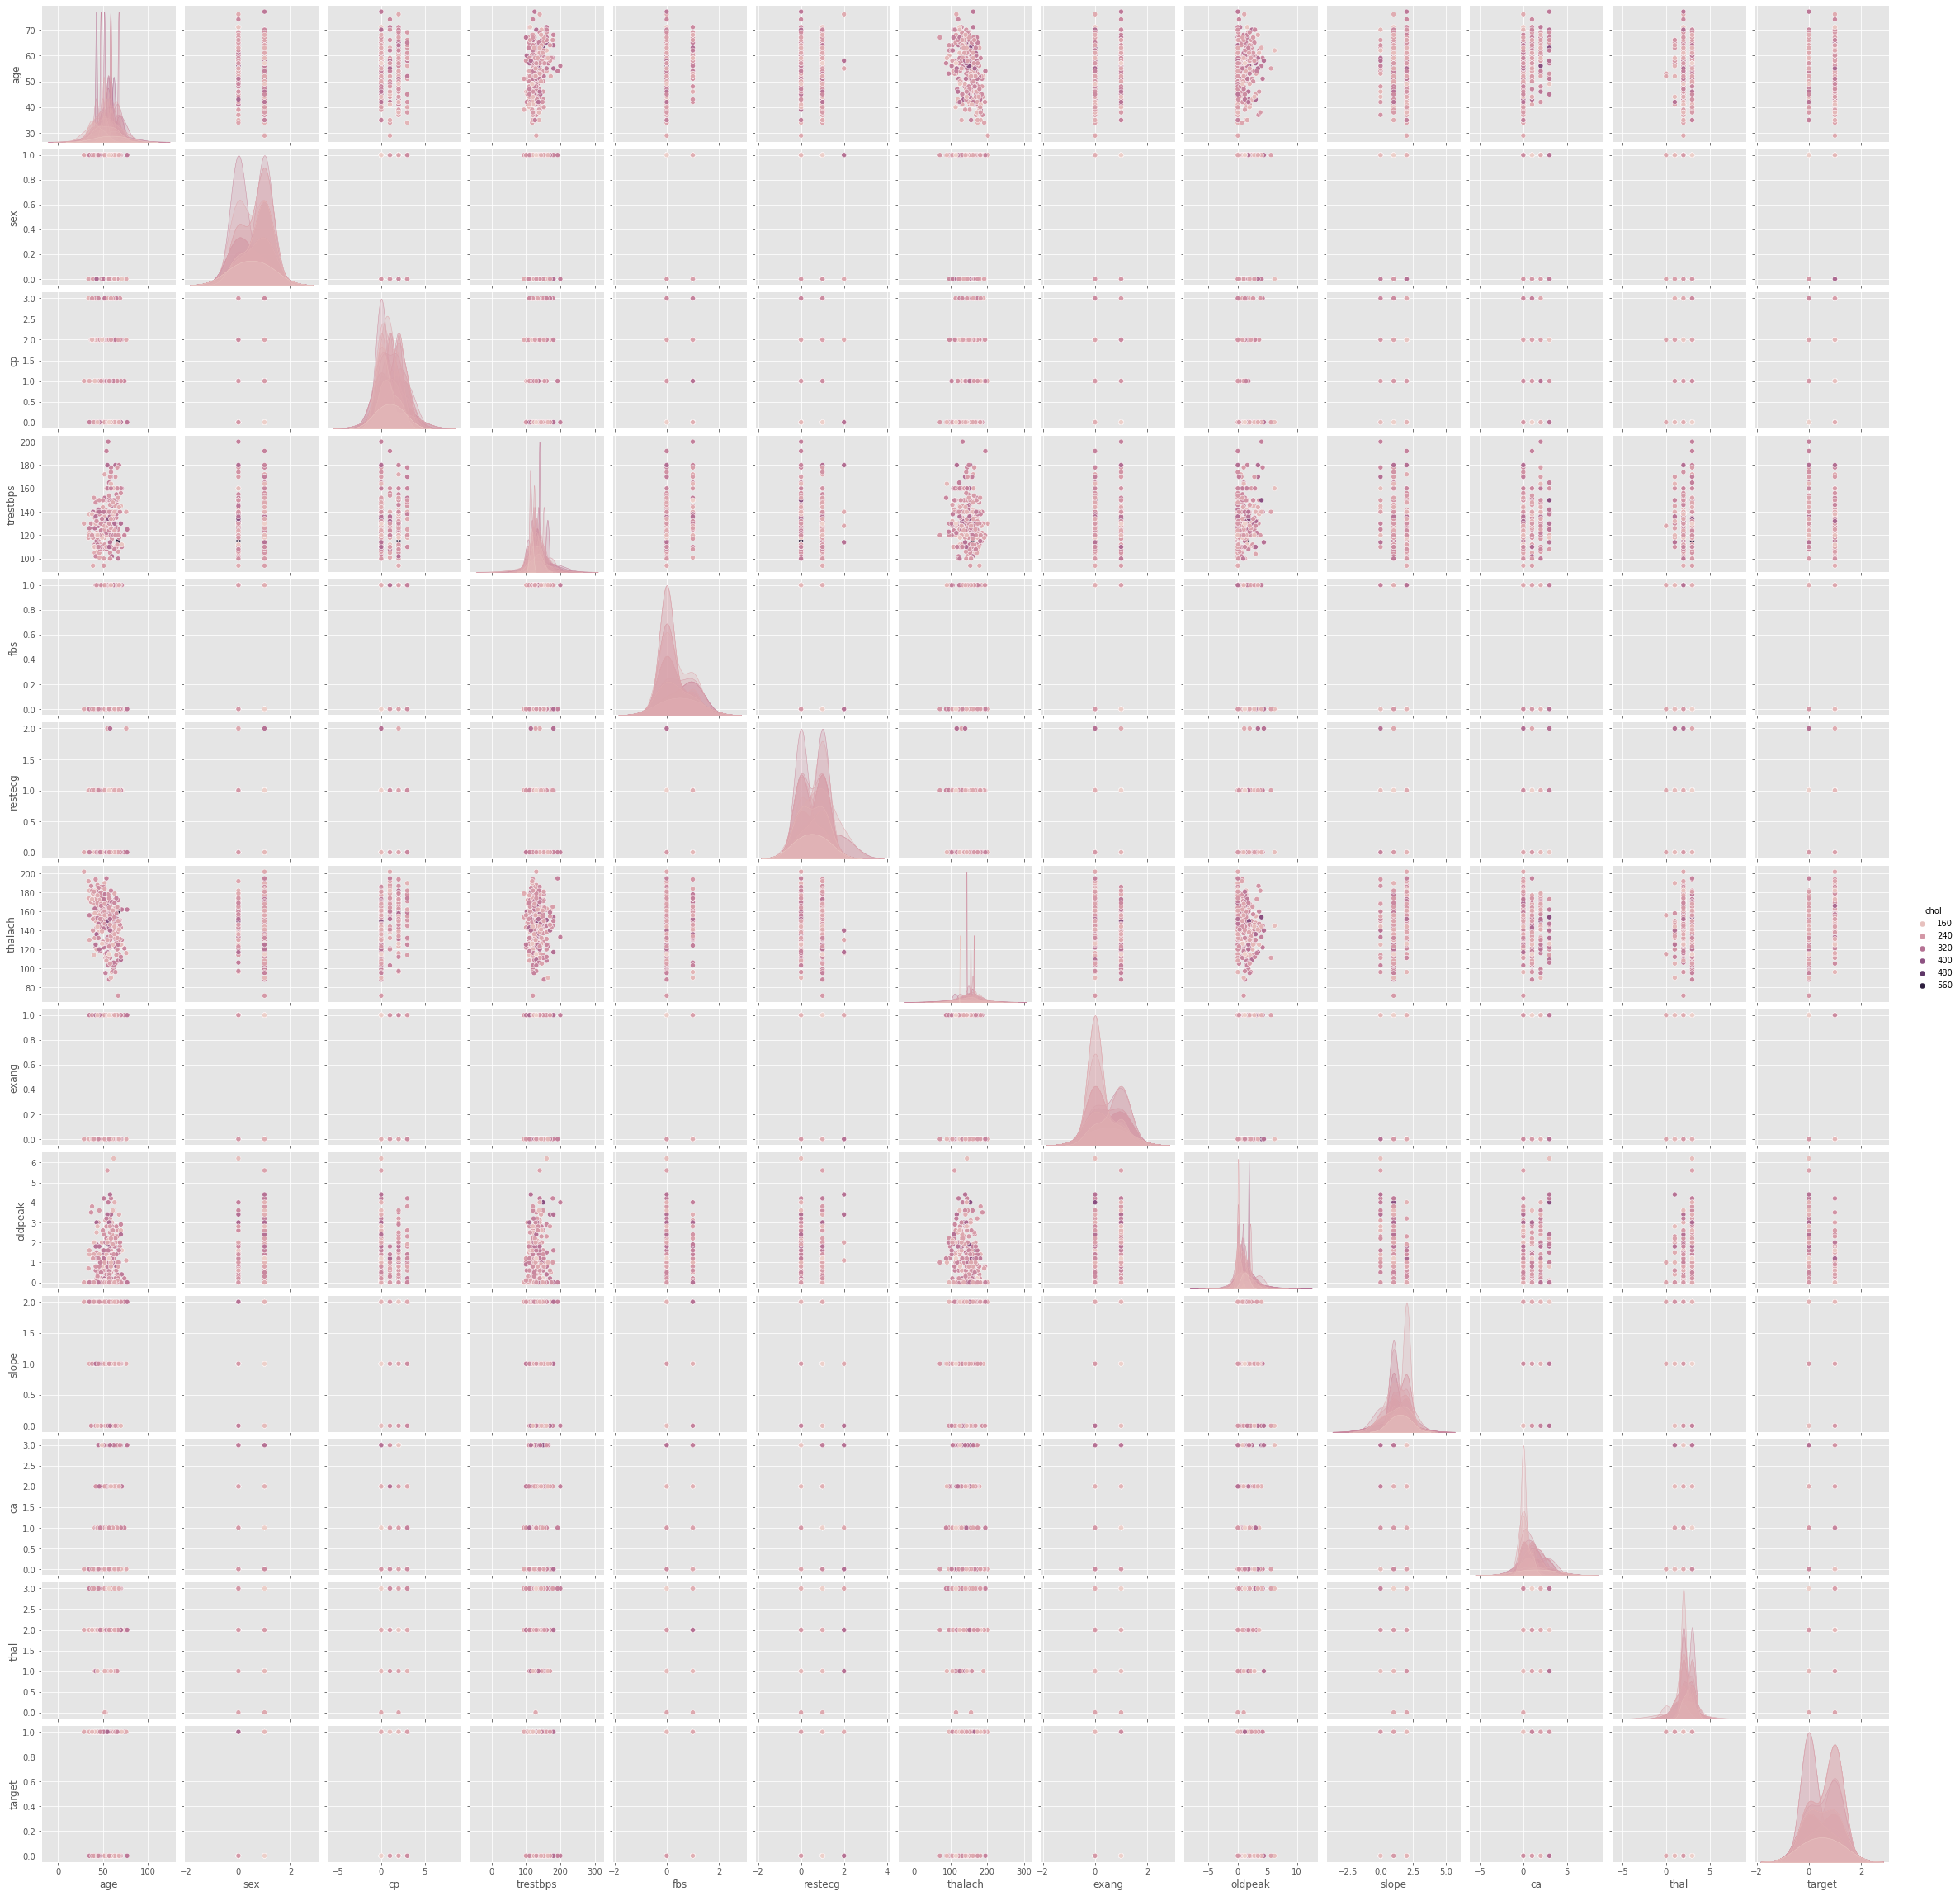

In [ ]:
sns.pairplot(df, kind='scatter', hue='chol')
plt.show()

**Error Correction**

In [ ]:
df['ca'].unique()


array([0, 2, 1, 3, 4], dtype=object)

In [ ]:
# to count the number in of each category decending order
print(df.ca.value_counts())

df[df['ca']==4]

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [ ]:
df.loc[df['ca']==4,'ca']=np.NaN

In [ ]:
df['ca'].unique()

array([0, 2, 1, 3, nan], dtype=object)

In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


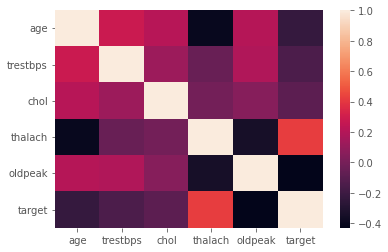

In [ ]:
sns.heatmap(df.corr());

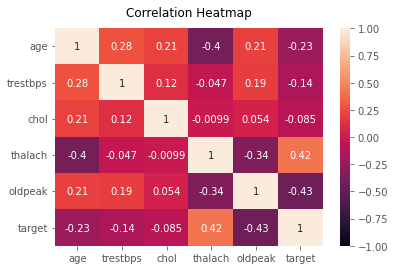

In [ ]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

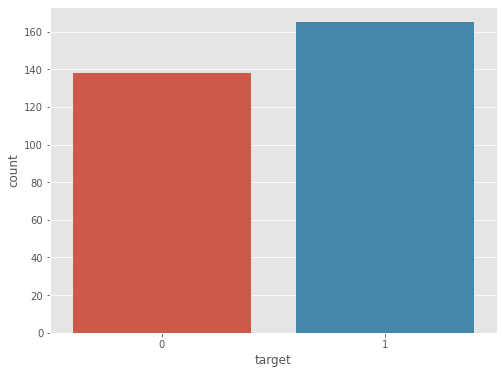

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df)
plt.show()

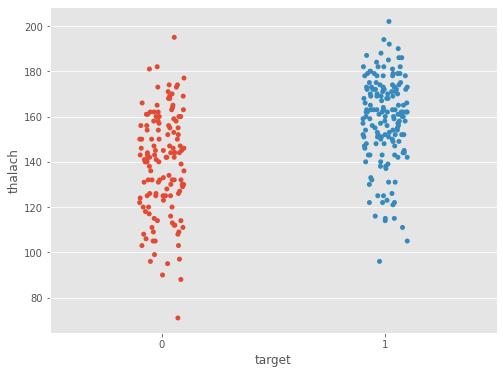

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=df)
plt.show()

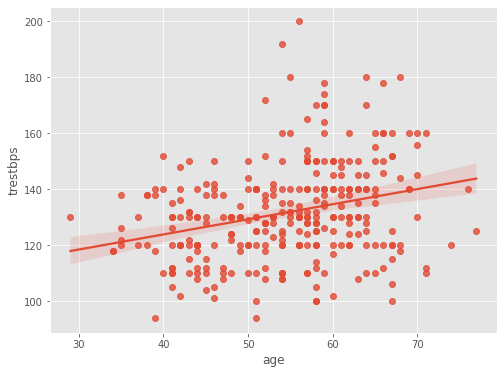

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="trestbps", data=df)
plt.show()

The above line shows that linear regression model is not good fit to the data.

Feature ‘thal’ ranges from 1–3, however, df.nunique() listed 0–3. There are two values of ‘0’. So lets change them to NaN

In [ ]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [ ]:
df.loc[df['thal']==0,'thal']=np.NaN

In [ ]:
df[df['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
df['thal'].unique()

array([1, 2, 3, nan], dtype=object)

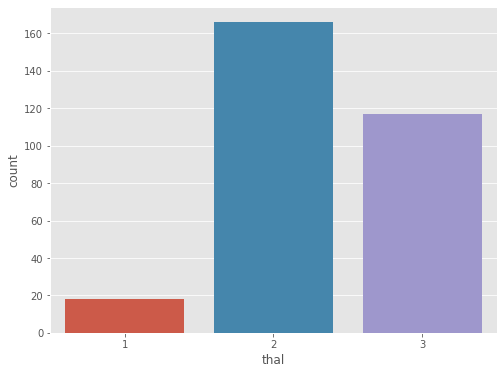

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x='thal', data=df)
plt.show()

Check for missing values and replace **them**

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [ ]:
# fit on the dataset
imputer.fit(df)

KNNImputer()

In [ ]:
...
# transform the dataset
Xtrans = imputer.transform(df)

In [ ]:
print('Missing: %d' % sum(np.isnan(Xtrans).flatten()))

Missing: 0


In [ ]:
df = df.fillna(df.median())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Check for duplicate rows**

In [ ]:
duplicated=df.duplicated().sum()
if duplicated:
  print("Duplicated rows :{}".format(duplicated))
else:
  print("No duplicates")

Duplicated rows :1


In [ ]:
duplicates=df[df.duplicated(keep=False)]
duplicates.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1


statistical summary

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000



change the labeling for better visualization and interpretation.

In [ ]:
df['target'] = df.target.replace({"Disease":1,"No_disease":0})
df['sex'] = df.sex.replace({"Male":1,"Female":0})
df['cp'] = df.cp.replace({"typical_angina":0, 
                          "atypical_angina":1, 
                          "non-anginal pain":2,
                          "asymtomatic":3})
df['exang'] = df.exang.replace({"Yes":1,"No":0})
df['fbs'] = df.fbs.replace({"True":1, "False":0})
df['slope'] = df.slope.replace({"upsloping":0,"flat":1,"downsloping":2})
df['thal'] = df.thal.replace({"fixed_defect":1,"reversable_defect":2,"normal":3})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

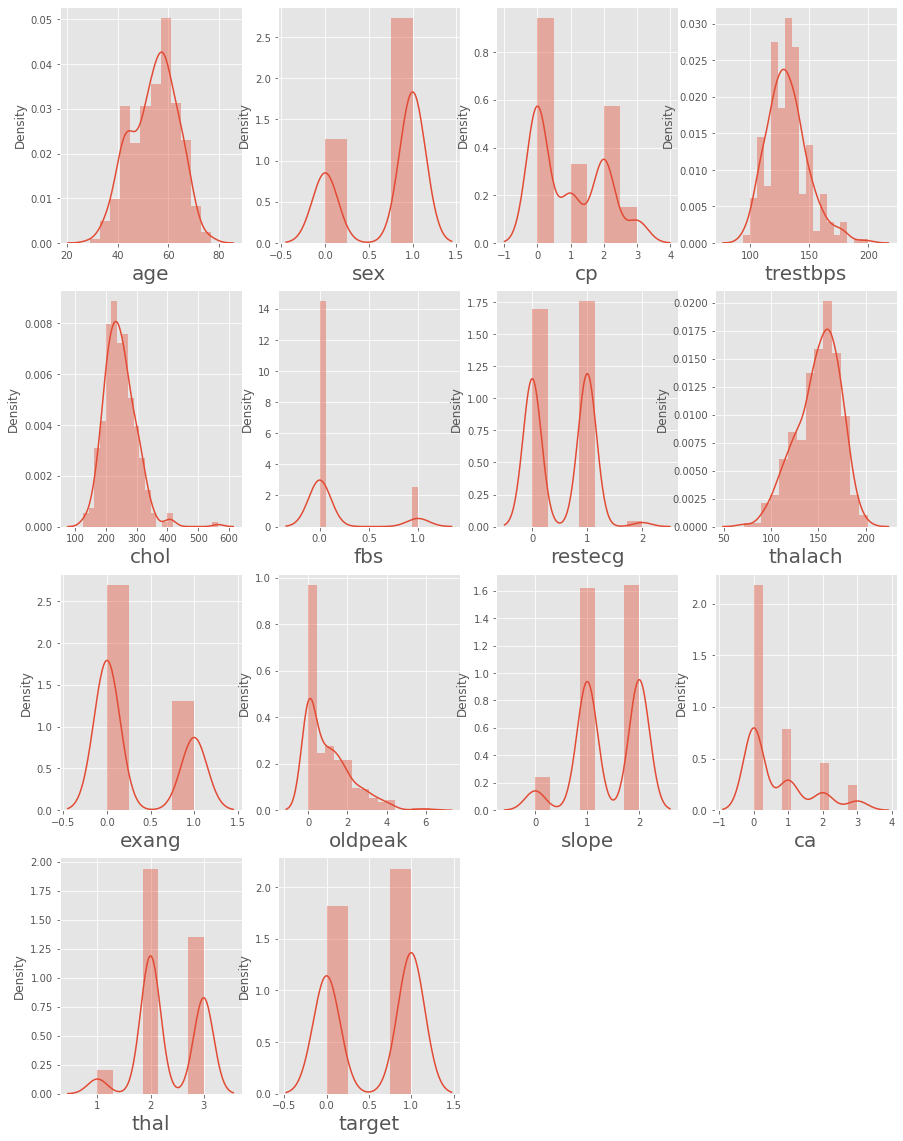

In [ ]:
## checking distributions
plt.figure(figsize=(15,20), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<15 : ## 14 columns in data 
        plt.subplot(4,4,plotnumber)## 4 : rows , 4: columns , plotnumber : position of plot
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


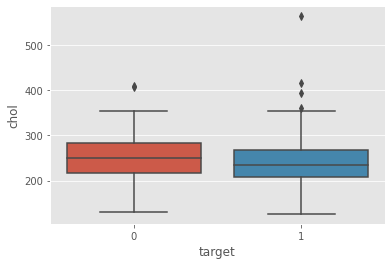

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
bxplt = sb.boxplot(df["target"],df["chol"])
plt.show()

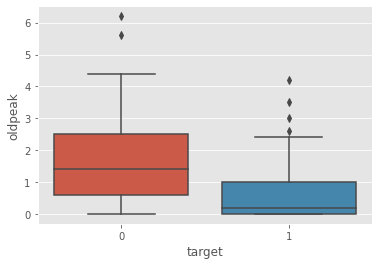

In [ ]:
sb.boxplot(x='target', y='oldpeak', data=df)

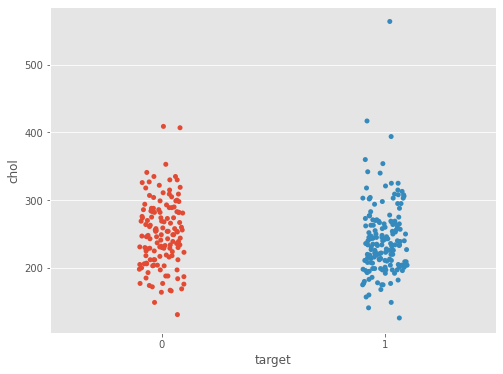

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="chol", data=df)
plt.show()

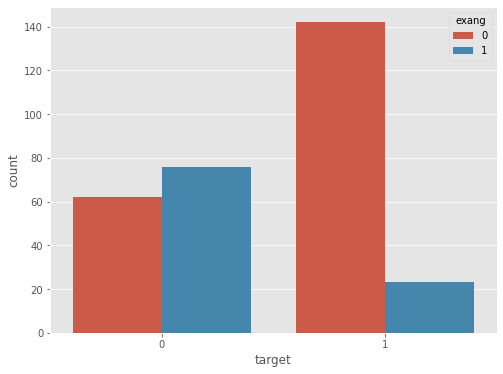

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="exang", data=df)
plt.show()

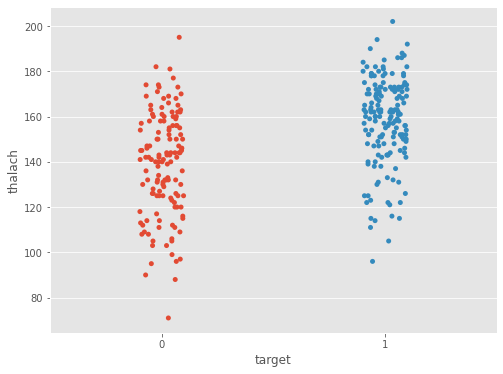

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=df)
plt.show()

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1


In [ ]:
features_cols=['age', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach', 'exang', 'oldpeak','slope','ca','thal']
x_train=df[features_cols]
print(df['target'].head())
y_train=df['target']

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [ ]:
# define continuous variable & plot
continous_features = ['age','trestbps','chol','thalach','oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.3,random_state=1234)

clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
Y_train_pred=clf.predict(x_train)
print("Accuracy:" , metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7472527472527473


In [ ]:
print("Accuracy:" , metrics.accuracy_score(y_test,y_pred)*100)

Accuracy: 74.72527472527473


[Text(0.5160256410256411, 0.9375, 'X[1] <= 0.5\ngini = 0.497\nsamples = 212\nvalue = [98, 114]'),
 Text(0.28205128205128205, 0.8125, 'X[10] <= 0.5\ngini = 0.387\nsamples = 103\nvalue = [76, 27]'),
 Text(0.20512820512820512, 0.6875, 'X[11] <= 2.5\ngini = 0.498\nsamples = 51\nvalue = [27, 24]'),
 Text(0.1282051282051282, 0.5625, 'X[7] <= 0.5\ngini = 0.4\nsamples = 29\nvalue = [8, 21]'),
 Text(0.05128205128205128, 0.4375, 'X[6] <= 96.5\ngini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(0.02564102564102564, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07692307692307693, 0.3125, 'X[3] <= 300.5\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.05128205128205128, 0.1875, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.10256410256410256, 0.1875, 'X[9] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07692307692307693, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1282051282051282, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.

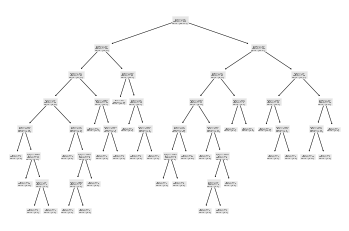

In [ ]:
from sklearn import tree
tree.plot_tree(clf)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

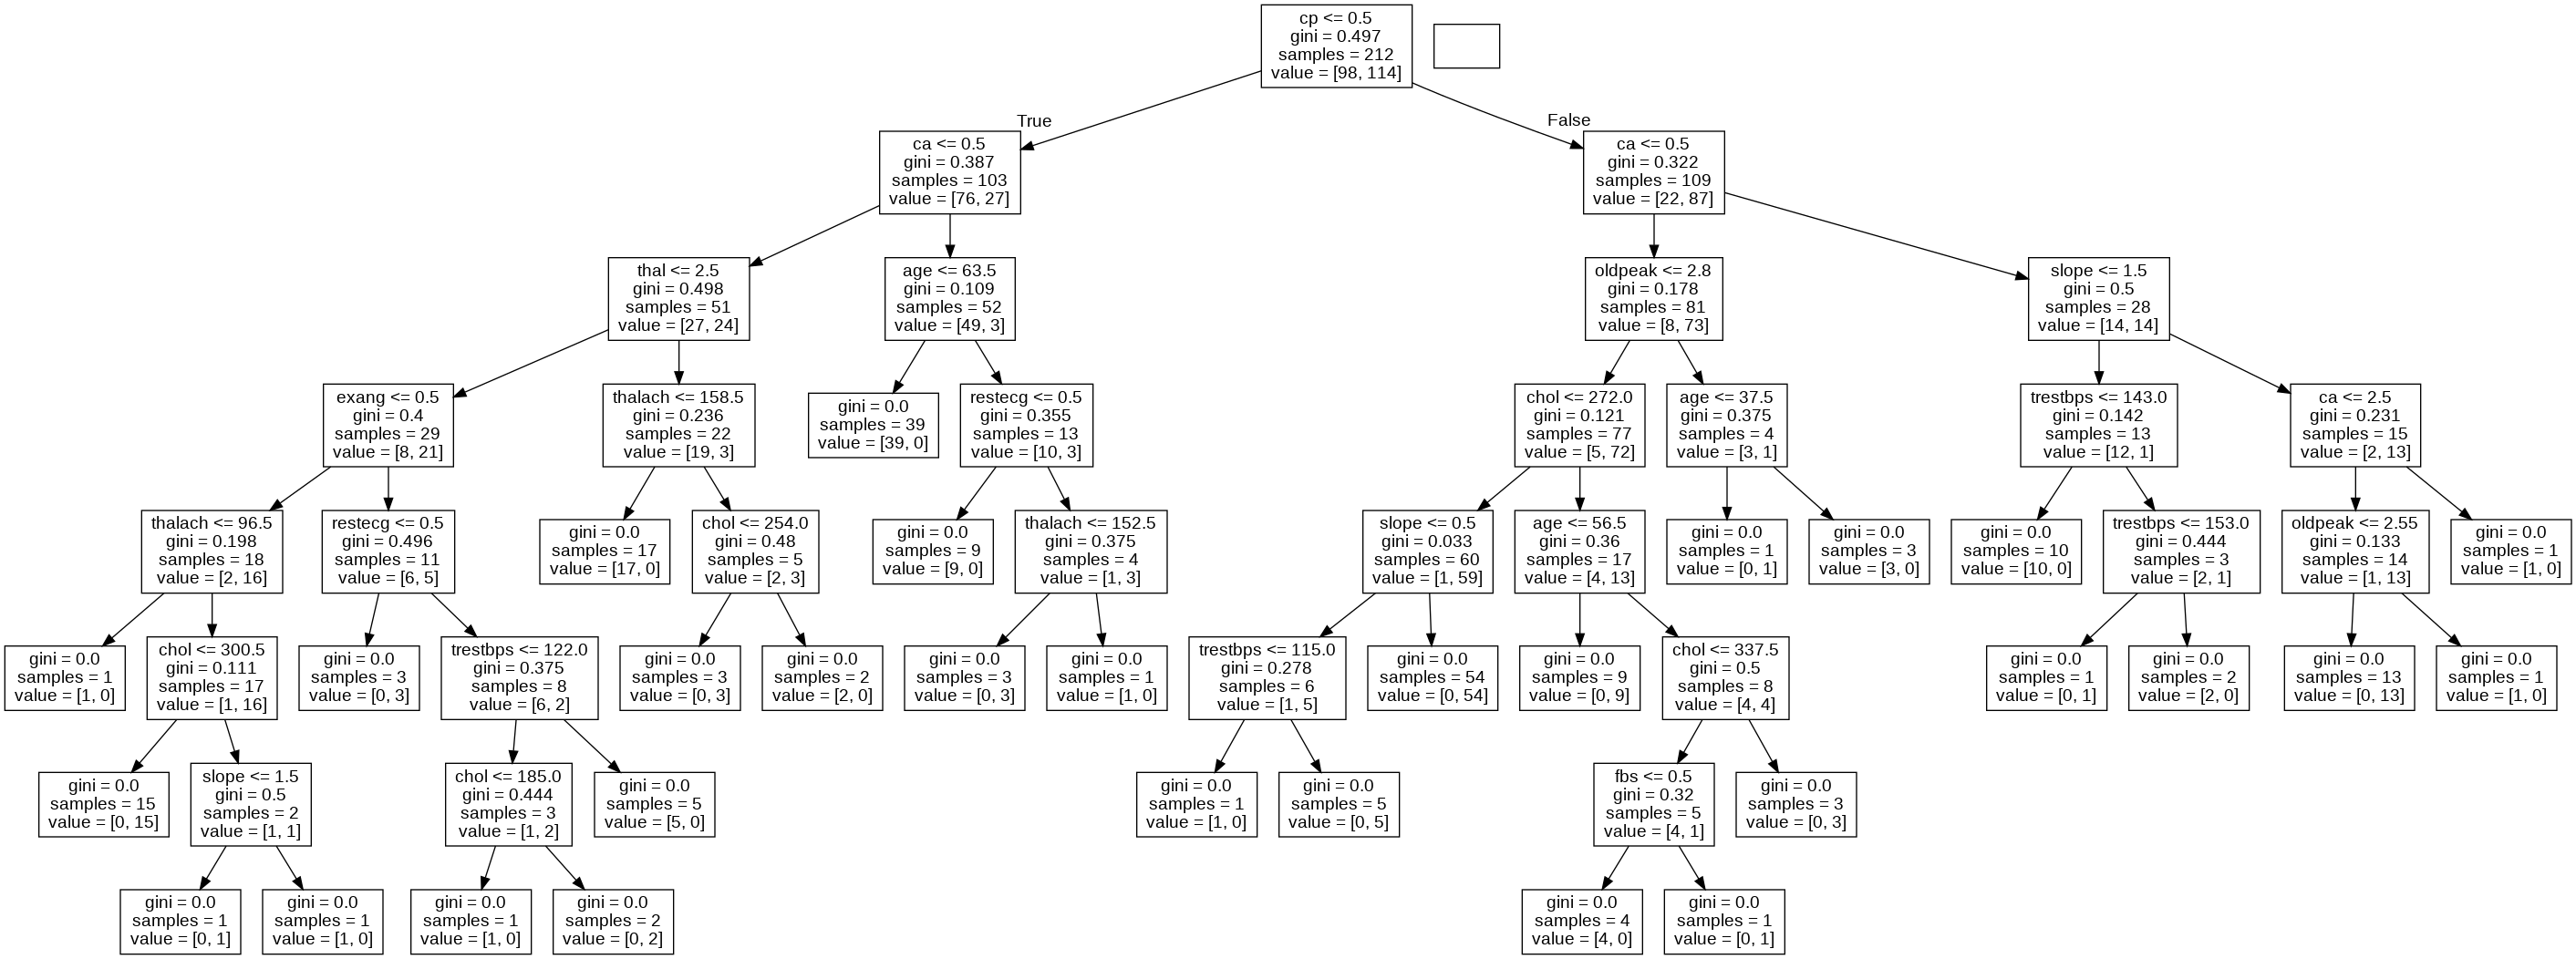

In [ ]:
data1=export_graphviz(clf,out_file=None , feature_names=features_cols)
graph=pydotplus.graph_from_dot_data(data1)
graph.write_png('/content/drive/MyDrive/Heart.png')

Image(graph.create_png())

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train)
y_pred1 = knn.predict(x_test)
print(accuracy_score(y_test,y_pred1))

0.6153846153846154
